In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt

In [9]:
training_mean_gazes = np.load('./training_mean_gazes.npz')['data']
validation_mean_gazes = np.load('./validation_mean_gazes.npz')['data']
test_mean_gazes = np.load('./test_mean_gazes.npz')['data']

print(training_mean_gazes.shape, validation_mean_gazes.shape, test_mean_gazes.shape)

lambda_func = lambda x: 1 if x == "depression" else 0
training_labels = pd.read_csv('../data/databases/D-vlog/splits/training.csv', index_col = 0)['label'].apply(lambda_func).tolist()
validation_labels = pd.read_csv('../data/databases/D-vlog/splits/validation.csv', index_col = 0)['label'].apply(lambda_func).tolist()
test_labels = pd.read_csv('../data/databases/D-vlog/splits/test.csv', index_col = 0)['label'].apply(lambda_func).tolist()

(577, 3) (94, 3) (189, 3)


In [25]:
mean_gazes = training_mean_gazes
labels = training_labels

scaler = StandardScaler()
pca = PCA(n_components=2)

s_mean_gazes= scaler.fit_transform(mean_gazes)
t_mean_gazes = pca.fit_transform(s_mean_gazes)

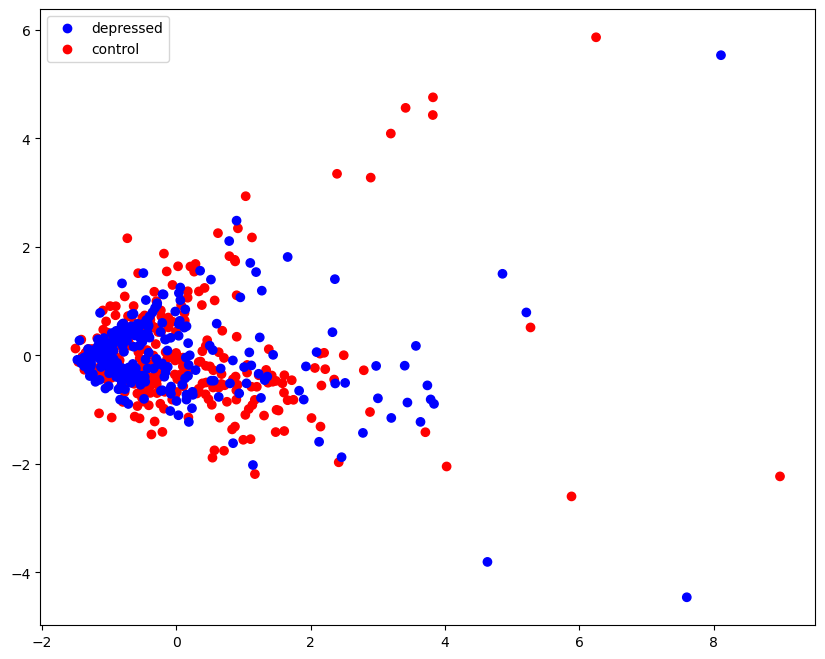

In [26]:
colors = ["blue", "red"]
plt.figure(figsize=(10,8))
plot = plt.scatter(t_mean_gazes[:,0], t_mean_gazes[:,1], c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.legend(handles=plot.legend_elements()[0], labels=["depressed", "control"])
plt.show()